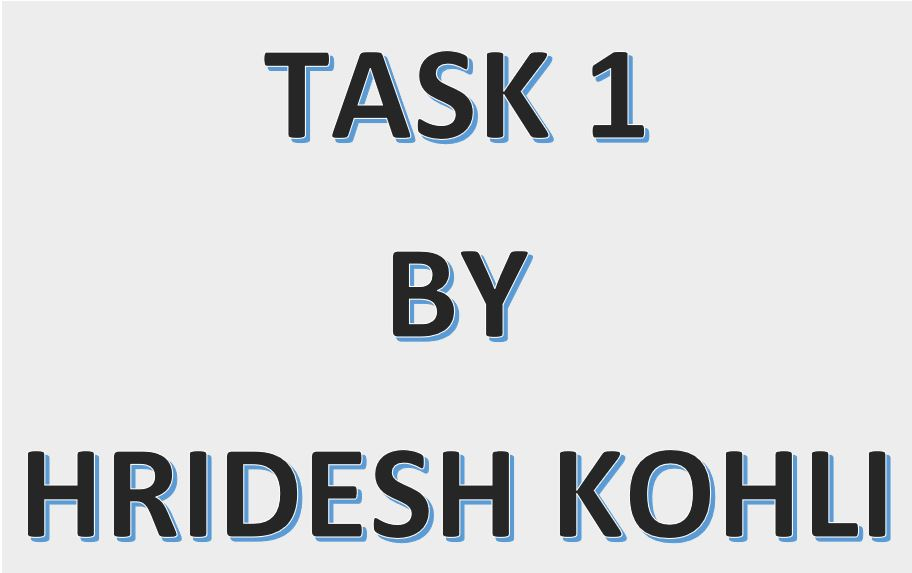

# <CENTER>TASK 1 OF SPARKS FOUNDATION GRIP NOV2020</CENTER>

# PREDICT STUDENT SCORES BASED ON THE NUMBER OF STUDY HOURS

The project is to build a model which can be trained on the input containing no. of study hours and the corresponding scores of the students and then can successfully predict scores by just providing no. of study hours as input

## Importing required libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Input the data
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [4]:
# Let's check top 5 rows of the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data preprocessing

#### - Checking for NaN values

In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### - Checking the shape of the data

In [7]:
data.shape

(25, 2)

It's a very small database with just 25 rows and 2 columns as the idea is just to provide a working intuitive model

#### - Checking the information of the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


As we can see, there are no categorical columns, hence there is no need for any encoding here

#### - Let's check the distribution of the data columns

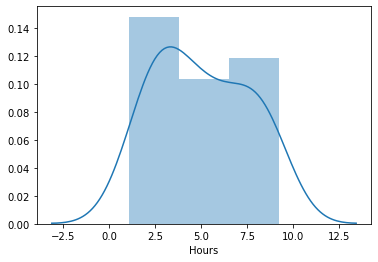

In [11]:
# Hours column distribution plot to check if the column is normally distributed
sns.distplot(data['Hours'])

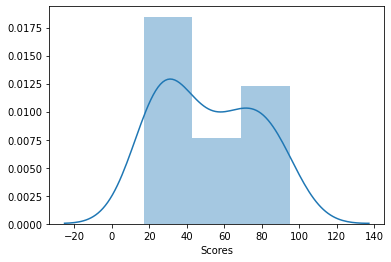

In [13]:
# Scores column distribution plot to check if the column is normally distributed
sns.distplot(data['Scores'])

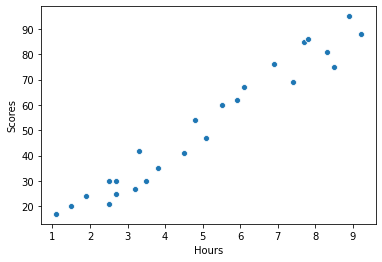

In [16]:
# Let's check the scatter plot of the dependent and independent variable
sns.scatterplot(x='Hours', y='Scores', data=data)

##### We can see above that there is a linear relationship between independent and dependent variable

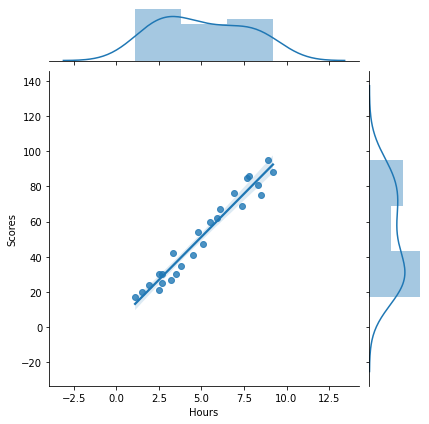

In [39]:
sns.jointplot(x='Hours', y='Scores', data=data, kind='reg')

## Modeling

#### - Importing necessary libraries

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

#### - Let's split the data into train and test set

In [17]:
X = data['Hours']
y = data['Scores']


X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=1)

#### - Let's build the model

In [18]:
# Let's instantiate the LinearRegression model
model_reg=LinearRegression()

In [20]:
model_reg.fit(X_train.to_frame(), y_train)

LinearRegression()

#### - Predictions

In [22]:
y_pred=model_reg.predict(X_test.to_frame())

#### - Evaluation

In [25]:
print(f' R2 Score is {r2_score(y_test, y_pred)}')

 R2 Score is 0.8421031525243527


## Let's predict the Scores if a student studies 9.5 hrs a day

In [33]:
y_pred_=model_reg.predict([[9.5]])
y_pred_[0]

97.84357145742356

### A student studying 9.5 hrs is predicted to score ~98 marks as per the model prediction